In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 5.5 MB 30.4 MB/s 
     |████████████████████████████████| 1.3 MB 53.9 MB/s 
     |████████████████████████████████| 163 kB 44.8 MB/s 
     |████████████████████████████████| 7.6 MB 39.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4476b11068770b8ee759cb587309c9f2d007be8dc609821a736fa1e9b0957a1d
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

In [ ]:
data = pd.read_excel('dataset.xlsx')
data.head(10)

,ï»¿iD,Response,Reviewer-1,word choice,Organization,Reviewer-2
0,1,An operating system (OS) is system software th...,4,3.0,1.0,4
1,1,An operating system is the most important soft...,5,2.0,3.0,4
2,1,Collection of programs that manages hardware r...,2,1.0,1.0,1
3,1,It is an interface user and machine(hardware),2,1.0,0.0,0
4,1,An operating system is a software which acts a...,3,2.0,1.0,4
5,1,It is a platform for humans to interact with h...,1,1.0,1.0,0
6,1,An operating system (OS) is system software th...,5,3.0,3.0,4
7,1,software which act as interface between user a...,3,2.0,1.0,1
8,1,Operating System is a software system that con...,4,2.0,1.0,4
9,1,An operating system (OS) is system software th...,4,2.0,2.0,4


In [ ]:
x = data['Response']
y = data['Reviewer-2'].tolist()
print(x)
print(y)

0       An operating system (OS) is system software th...
1       An operating system is the most important soft...
2       Collection of programs that manages hardware r...
3           It is an interface user and machine(hardware)
4       An operating system is a software which acts a...
                              ...                        
2385    Single processor contains only one processer.w...
2386    Single processor systems are less reliable tha...
2387    Single processor system contains only one proc...
2388    Single processor can assign only one task but ...
2389    Single Processor\n-> Uses a single cpu\n-> Eas...
Name: Response, Length: 2390, dtype: object
[4, 4, 1, 0, 4, 0, 4, 1, 4, 4, 4, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 3, 3, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 0, 4, 4, 1, 4, 4, 0, 4, 4, 1, 1, 0, 4, 1, 1, 1, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(x)

In [ ]:
embeddings

array([[-0.02357353, -0.01503747, -0.00397871, ...,  0.02411804,
         0.0362772 ,  0.0074688 ],
       [-0.02846667,  0.03639808,  0.00822516, ...,  0.03154779,
         0.01749238, -0.00048567],
       [-0.00468063, -0.02878353, -0.03404774, ...,  0.00117501,
        -0.02464179,  0.00338477],
       ...,
       [-0.02753562, -0.01181827, -0.02199969, ..., -0.03585221,
         0.05486577, -0.01896431],
       [ 0.01241688, -0.06888344, -0.03817156, ..., -0.02222495,
        -0.00727084, -0.03246032],
       [-0.01234783, -0.00325741, -0.02912418, ..., -0.04279251,
         0.02785357, -0.00177822]], dtype=float32)

In [ ]:
from sklearn.cluster import k_means
km = k_means(embeddings, 5)

In [ ]:
km

(array([[-0.02103872, -0.02092961, -0.00024152, ...,  0.03119548,
          0.02735277,  0.00485683],
        [-0.02714042, -0.07706529, -0.0383788 , ..., -0.0099734 ,
          0.02427408, -0.02762904],
        [-0.02417455, -0.03638525, -0.03649794, ..., -0.04667457,
          0.02710086, -0.01074979],
        [-0.02559111, -0.02044914, -0.04196379, ..., -0.01509687,
          0.01537962, -0.01089047],
        [-0.00430198, -0.05951546, -0.01449855, ...,  0.01309957,
         -0.01033495, -0.0074522 ]], dtype=float32),
 array([0, 0, 4, ..., 2, 2, 2], dtype=int32),
 784.1347045898438)

In [ ]:
mat = [km]

In [ ]:
mat

[(array([[-0.02103872, -0.02092961, -0.00024152, ...,  0.03119548,
           0.02735277,  0.00485683],
         [-0.02714042, -0.07706529, -0.0383788 , ..., -0.0099734 ,
           0.02427408, -0.02762904],
         [-0.02417455, -0.03638525, -0.03649794, ..., -0.04667457,
           0.02710086, -0.01074979],
         [-0.02559111, -0.02044914, -0.04196379, ..., -0.01509687,
           0.01537962, -0.01089047],
         [-0.00430198, -0.05951546, -0.01449855, ...,  0.01309957,
          -0.01033495, -0.0074522 ]], dtype=float32),
  array([0, 0, 4, ..., 2, 2, 2], dtype=int32),
  784.1347045898438)]

In [ ]:
y_pred = mat[0][1]

In [ ]:
y_pred

array([4, 4, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
ans=y_pred

In [ ]:
abc=[]
for i in ans:
    abc.append(i)

In [ ]:
abc

[4,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,


In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
cohen_kappa_score(y,abc)

0.8687448637999962

In [ ]:
result=cohen_kappa_score(y,abc,weights='linear')
print(result)


0.8481402772247899


In [ ]:
import matplotlib.pyplot as mp

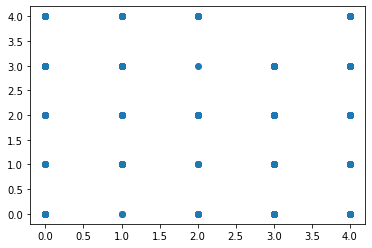

In [ ]:
mp.scatter(abc,y)

In [ ]:
from scipy.cluster import  hierarchy
threshold = 0.1
Z = hierarchy.linkage(embeddings,"average", metric="cosine")
C = hierarchy.fcluster(Z, threshold, criterion="distance")
print(embeddings,Z,C)

[[-0.02357353 -0.01503747 -0.00397871 ...  0.02411804  0.0362772
   0.0074688 ]
 [-0.02846667  0.03639808  0.00822516 ...  0.03154779  0.01749238
  -0.00048567]
 [-0.00468063 -0.02878353 -0.03404774 ...  0.00117501 -0.02464179
   0.00338477]
 ...
 [-0.02753562 -0.01181827 -0.02199969 ... -0.03585221  0.05486577
  -0.01896431]
 [ 0.01241688 -0.06888344 -0.03817156 ... -0.02222495 -0.00727084
  -0.03246032]
 [-0.01234783 -0.00325741 -0.02912418 ... -0.04279251  0.02785357
  -0.00177822]] [[0.00000000e+00 6.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.59000000e+02 2.85000000e+02 0.00000000e+00 2.00000000e+00]
 [9.00000000e+00 2.39000000e+03 0.00000000e+00 3.00000000e+00]
 ...
 [4.73000000e+03 4.74900000e+03 8.64300949e-01 4.00000000e+00]
 [4.77400000e+03 4.77600000e+03 9.09938693e-01 2.36600000e+03]
 [4.77500000e+03 4.77700000e+03 9.64334096e-01 2.39000000e+03]] [736 734 831 ... 209 264 206]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(embeddings[1].shape)
print(cosine_similarity(embeddings[0].reshape(1,-1),embeddings[2].reshape(1,-1)))

(768,)
[[0.4490642]]


In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('An operating system (OS) is system software th')
passage_embedding = model.encode(['An operating system is the most important s',
                                  ' An operating system is a software which acts a.'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Similarity: tensor([[0.6996, 0.8913]])


In [ ]:
!pip install ClusterTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ClusterTransformer: filename=ClusterTransformer-0.1-py3-none-any.whl size=4714 sha256=2ac6f4db487a09263740ca64745d585a9447e5f69faa1e3a6906ac8c560aa980
  Stored in directory: /root/.cache/pip/wheels/8f/90/84/f5accb3e3232dc53cc601e4305f0f5168bc3eee31b5d6a3e32
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=7175da431292080c5893c4a147626d7cf4c98d2a713fc0523f3244f173131d69
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built ClusterTransformer sklearn


In [ ]:
import ClusterTransformer.ClusterTransformer as ctrans

In [ ]:
cr=ctrans.ClusterTransformer()
model_name='bert-large-uncased'

In [ ]:
print(cr)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([2, 2, 4, ..., 1, 1, 1], dtype=int32)

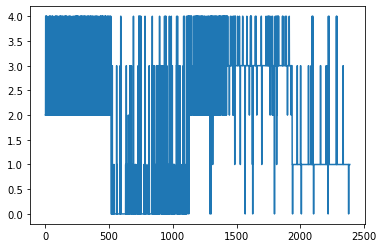

In [ ]:
mp.plot(cluster_assignment)

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(data['Reviewer-2'])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Streaming output truncated to the last 5000 lines.
2389    1
Name: Reviewer-2, Length: 2390, dtype: int64, 0       4
1       4
2       1
3       0
4       4
       ..
2385    1
2386    1
2387    1
2388    1
2389    1
Name: Reviewer-2, Length: 2390, dtype: int64, 0       4
1       4
2       1
3       0
4       4
       ..
2385    1
2386    1
2387    1
2388    1
2389    1
Name: Reviewer-2, Length: 2390, dtype: int64, 0       4
1       4
2       1
3       0
4       4
       ..
2385    1
2386    1
2387    1
2388    1
2389    1
Name: Reviewer-2, Length: 2390, dtype: int64, 0       4
1       4
2       1
3       0
4       4
       ..
2385    1
2386    1
2387    1
2388    1
2389    1
Name: Reviewer-2, Length: 2390, dtype: int64, 0       4
1       4
2       1
3       0
4       4
       ..
2385    1
2386    1
2387    1
2388    1
2389    1
Name: Reviewer-2, Length: 2390, dtype: int64, 0       4
1       4
2       1
3       0
4       4
       ..
2385    1
2386    1
2387    1
2388    1
2389    1
Nam

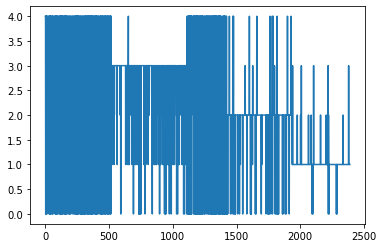

In [ ]:
mp.plot(abc)

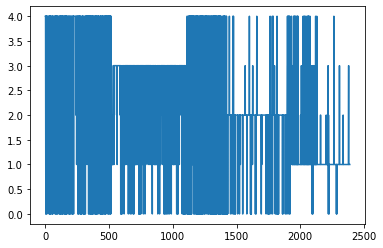

In [ ]:
mp.plot(y)

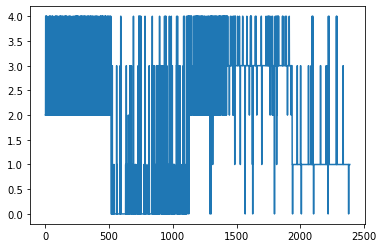

In [ ]:
mp.plot(cluster_assignment)

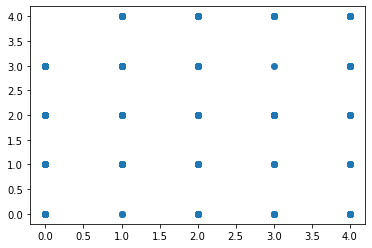

In [ ]:
mp.scatter(cluster_assignment,y)

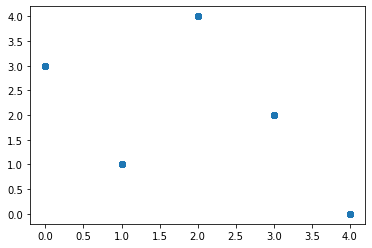

In [ ]:
mp.scatter(cluster_assignment,abc)

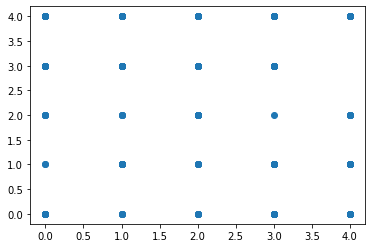

In [ ]:
mp.scatter(y,abc)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags

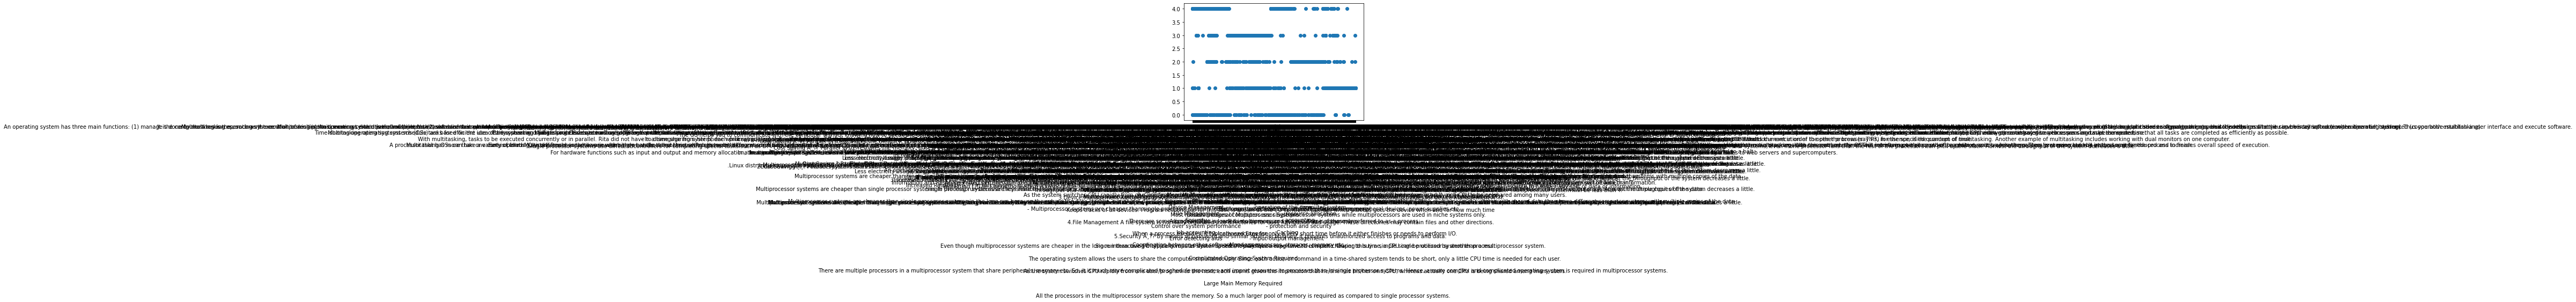

In [ ]:
mp.scatter(x,y)